# Conway’s Game of Life

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys, argparse
from IPython.display import display, clear_output



ON = 255
OFF = 0
GREY = 100
vals = [ON, OFF]

In [106]:
def randomGrid(N):
    """returns a grid of NxN random values"""
    return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)
def addGlider(i, j, grid):
    """adds a glider with top left cell at (i, j)"""
    print(grid)
    glider = np.array([[0,0, 255],
                    [255, 0, 255],
                    [0, 255, 255]])
    grid[i:i+3, j:j+3] = glider
    return(grid)

In [76]:
randomGrid(5)

array([[  0, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255],
       [255,   0, 255,   0,   0],
       [  0,   0,   0,   0,   0]])

In [4]:
zero = np.zeros(7*7).reshape(7,7)
zero

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [5]:
addGlider(0,0,zero)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


array([[  0.,   0., 255.,   0.,   0.,   0.,   0.],
       [255.,   0., 255.,   0.,   0.,   0.,   0.],
       [  0., 255., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [6]:
randomGrid(5)

array([[  0, 255, 255,   0, 255],
       [255,   0, 255,   0,   0],
       [  0, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0]])

In [7]:
gun = np.zeros(2*2).reshape(2,2)
gun[0][1] = 255
gun[1][1] = 255
print(randomGrid(5), gun)
randomGrid(5)[0:0+2, 0:0+2] = gun
randomGrid(5)

[[  0   0   0   0 255]
 [  0 255 255   0   0]
 [  0   0   0   0   0]
 [255   0   0   0   0]
 [  0   0   0 255 255]] [[  0. 255.]
 [  0. 255.]]


array([[  0,   0,   0, 255,   0],
       [  0, 255,   0,   0, 255],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255],
       [  0,   0,   0, 255,   0]])

In [107]:
def addGosperGliderGun(i, j, grid):
    """adds a Gosper Glider Gun with top left cell at (i, j)"""
    gun = np.zeros(5*5).reshape(5,5)
    gun[4][1] = gun[1][4] = 255
    gun[3][1] = gun[2][2] = 255
    
    grid[i:i+5, j:j+5] = gun
    return(grid)

In [100]:
addGosperGliderGun(0,0,randomGrid(10))

array([[  0,   0,   0,   0,   0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0, 255,   0,   0, 255,   0,   0],
       [  0,   0, 255,   0,   0, 255,   0,   0, 255,   0],
       [  0, 255,   0,   0,   0,   0,   0, 255,   0, 255],
       [  0, 255,   0,   0,   0,   0,   0, 255,   0, 255],
       [  0,   0,   0,   0,   0,   0, 255,   0, 255,   0],
       [  0,   0,   0, 255,   0,   0,   0, 255,   0, 255],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255,   0,   0]])

In [10]:
def addGosperGliderGun(i, j, grid):
    """adds a Gosper Glider Gun with top left cell at (i, j)"""
    gun = np.zeros(11*11).reshape(11, 11)
    gun[5][1] = gun[5][2] = 255
    gun[6][1] = gun[6][2] = 255
    
    gun[3][13] = gun[3][14] = 255
    gun[4][12] = gun[4][16] = 255
    gun[5][11] = gun[5][17] = 255
    gun[6][11] = gun[6][15] = gun[6][17] = gun[6][18] = 255
    gun[7][11] = gun[7][17] = 255
    gun[8][12] = gun[8][16] = 255
    gun[9][13] = gun[9][14] = 255
    
    gun[1][25] = 255
    gun[2][23] = gun[2][25] = 255
    gun[3][21] = gun[3][22] = 255
    gun[4][21] = gun[4][22] = 255
    gun[5][21] = gun[5][22] = 255
    
    gun[6][23] = gun[6][25] = 255
    gun[7][25] = 255
    
    gun[3][35] = gun[3][36] = 255
    gun[4][35] = gun[4][36] = 255
    
    grid[i:i+11, j:j+38] = gun

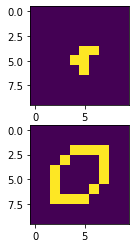

In [43]:
fig, ax = plt.subplots(2)
img1 = ax[0].imshow(gun, interpolation='nearest')
img = ax[1].imshow(rep, interpolation='nearest')
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                                frames = 10,
                                interval=updateInterval,
                                save_count=50)

In [12]:
gun = np.zeros(10*10).reshape(10,10)
gun[4][5] = gun[4][6] = 255
gun[5][5] = gun[5][4] = gun[6][5] = 255
gun

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 255., 255.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 255., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [13]:
rep = np.zeros(10*10).reshape(10,10)
rep[2][4]=rep[2][5]=rep[2][6]=rep[2][7]=rep[3][7]=255
rep[4][7]=rep[5][7]=rep[3][3]=rep[4][2]=rep[5][2]=255
rep[6][2]=rep[7][2]=rep[7][3]=rep[7][4]=rep[7][5]=255
rep[6][6]=255
rep

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 255., 255., 255., 255.,   0.,   0.],
       [  0.,   0.,   0., 255.,   0.,   0.,   0., 255.,   0.,   0.],
       [  0.,   0., 255.,   0.,   0.,   0.,   0., 255.,   0.,   0.],
       [  0.,   0., 255.,   0.,   0.,   0.,   0., 255.,   0.,   0.],
       [  0.,   0., 255.,   0.,   0.,   0., 255.,   0.,   0.,   0.],
       [  0.,   0., 255., 255., 255., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

69


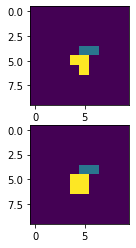

In [122]:
#check the result of each generation
N=10
a=0
gun = np.zeros(10*10).reshape(10,10)
gun[4][5] = gun[4][6] = 100
gun[5][5] = gun[5][4] = gun[6][5] = 255
for k in range(69):
    newGrid = gun.copy()
    for i in range(N):
        for j in range(N):
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((gun[i, (j-1)%N] + gun[i, (j+1)%N] +
                        gun[(i-1)%N, j] + gun[(i+1)%N, j] +
                        gun[(i-1)%N, (j-1)%N] + gun[(i-1)%N, (j+1)%N] +
                        gun[(i+1)%N, (j-1)%N] + gun[(i+1)%N, (j+1)%N])/255)
            # apply Conway's rules
            if gun[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    gun[:] = newGrid[:]
    a+=1
gun = np.zeros(10*10).reshape(10,10)
gun[4][5] = gun[4][6] = 100
gun[5][5] = gun[5][4] = gun[6][5] = 255
fig, ax = plt.subplots(2)
img = ax[0].imshow(gun, interpolation='nearest') 
img1 = ax[1].imshow(newGrid, interpolation='nearest')
ani = animation.FuncAnimation(fig, update,frames = 10,interval=updateInterval,save_count=50)
print(a)

In [62]:
gun = np.zeros(10*10).reshape(10,10)
gun[4][5] = gun[4][6] = 255
gun[5][5] = gun[5][4] = gun[6][5] = 255
gill=gun.copy()
gill[gun==0]=1
gill[gun==255]=0
gill

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [17]:
grid = randomGrid(10)
gill = grid.copy()
gill[grid==0]=100
gill[grid==255]=0
grid,gill

(array([[  0,   0,   0,   0, 255,   0,   0,   0, 255, 255],
        [  0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
        [255,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0, 255,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
        [  0,   0,   0, 255,   0,   0,   0, 255, 255, 255],
        [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0],
        [  0,   0,   0, 255,   0, 255,   0,   0,   0,   0],
        [  0, 255,   0,   0,   0,   0,   0, 255,   0, 255],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255]]),
 array([[100, 100, 100, 100,   0, 100, 100, 100,   0,   0],
        [100, 100, 100,   0, 100, 100, 100, 100, 100, 100],
        [  0, 100, 100, 100, 100, 100, 100, 100, 100, 100],
        [100, 100,   0, 100, 100, 100, 100, 100, 100, 100],
        [100, 100, 100, 100, 100, 100, 100, 100, 100,   0],
        [100, 100, 100,   0, 100, 100, 100,   0,   0,   0],
        [100, 100, 100, 100, 100, 100,

[[255   0   0   0   0   0 255   0   0   0]
 [  0 255   0   0   0   0 255   0   0   0]
 [  0 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0 255   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0 255   0   0   0   0   0   0   0]
 [  0   0   0 255 255 255   0   0   0   0]
 [  0   0   0   0 255   0 255   0 255 255]
 [  0 255   0   0   0   0   0   0   0   0]]
[[255   0   0   0   0   0 255   0   0   0]
 [  0 255   0   0   0   0 255   0   0   0]
 [  0 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0 255   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0 255   0   0   0   0   0   0   0]
 [  0   0   0 255 255 255   0   0   0   0]
 [  0   0   0   0 255   0 255   0 255 255]
 [  0 255   0   0   0   0   0   0   0   0]]


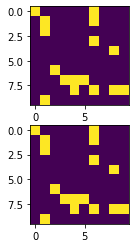

In [1536]:
N=7
a=0
gun = np.zeros(10*10).reshape(10,10)
gun[4][5] = gun[4][6] = 255
gun[5][5] = gun[5][4] = gun[6][5] = 255
grid = randomGrid(10)
print(grid)
gill = grid.copy()
gill[grid==0]=100
gill[grid==255]=0
for k in range(10):
    newGrid = grid.copy()
    for i in range(N):
        #print(i)
        for j in range(N):
            #print(j)
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            total2 = int((gill[i, (j-1)%N] + gill[i, (j+1)%N] +
                        gill[(i-1)%N, j] + gill[(i+1)%N, j] +
                        gill[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        gill[(i+1)%N, (j-1)%N] + gill[(i+1)%N, (j+1)%N])/100)
            #print(total,total2)
            # apply Conway's rules
        
            if grid[i, j] == OFF:
                if (total == 2) and (total2 == 1) :
                    newGrid[i, j] = GREY
            
    grid[:] = newGrid[:]
    a+=1

print(grid)
fig, ax = plt.subplots(2)
img = ax[0].imshow(grid, interpolation='nearest') 
img1 = ax[1].imshow(newGrid, interpolation='nearest')
ani = animation.FuncAnimation(fig, update,frames = 10,interval=updateInterval,save_count=50)

In [164]:
def immi(frameNum, img, grid, N):
    
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            total1 = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/100)
            # apply Conway's rules
            a=total+total1#total number of both typer of living cells

            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            elif grid[i,j] == GREY:
                if (total1 < 2) or (total1 > 3):
                    newGrid[i, j] = OFF
            else:
                if (a==3):
                    if total == 2:
                        newGrid[i,j] == ON
                    elif total1 == 2 :
                        newGrid[i,j] == GREY
            #ANOTHER LIFE TYPE OF GREY       
    # update data
    #print(newGrid,grid)    
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

In [19]:
immi(10,img,gun,10)

(<matplotlib.image.AxesImage at 0x7f18ac123100>,)

In [63]:
gun

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 255., 255.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 255., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

69


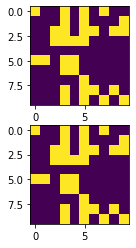

In [64]:
N=10
a=0
gun = np.zeros(10*10).reshape(10,10)
gun[4][5] = gun[4][6] = 255
gun[5][5] = gun[5][4] = gun[6][5] = 255
grid = gun.copy()
for k in range(69):
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            # apply Conway's rules
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
            
    grid[:] = newGrid[:]
    a+=1

fig, ax = plt.subplots(2)
img = ax[0].imshow(grid, interpolation='nearest') 
img1 = ax[1].imshow(newGrid, interpolation='nearest')
ani = animation.FuncAnimation(fig, update,frames = 10,interval=updateInterval,save_count=50)
print(a)

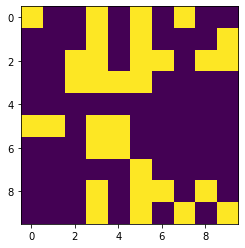

In [70]:
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')

In [117]:
def update1(frameNum, img, grid, N):
    
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if (total == 3) or (total == 6): #anothe rulea : a dead cell comes to life if it is sur-
#rounded by 6 living cells
                    newGrid[i, j] = ON
            
    # update data
    #print(newGrid,grid)    
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

In [25]:
rep = np.zeros(10*10).reshape(10,10)
rep[2][4]=rep[2][5]=rep[2][6]=rep[2][7]=rep[3][7]=255
rep[4][7]=rep[5][7]=rep[3][3]=rep[4][2]=rep[5][2]=255
rep[6][2]=rep[7][2]=rep[7][3]=rep[7][4]=rep[7][5]=255
rep[6][6]=255
rep

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 255., 255., 255., 255.,   0.,   0.],
       [  0.,   0.,   0., 255.,   0.,   0.,   0., 255.,   0.,   0.],
       [  0.,   0., 255.,   0.,   0.,   0.,   0., 255.,   0.,   0.],
       [  0.,   0., 255.,   0.,   0.,   0.,   0., 255.,   0.,   0.],
       [  0.,   0., 255.,   0.,   0.,   0., 255.,   0.,   0.,   0.],
       [  0.,   0., 255., 255., 255., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [61]:
gun

array([[255.,   0.,   0., 255.,   0., 255.,   0., 255.,   0.,   0.],
       [  0.,   0.,   0., 255.,   0., 255.,   0.,   0.,   0., 255.],
       [  0.,   0., 255., 255.,   0., 255., 255.,   0., 255., 255.],
       [  0.,   0., 255., 255., 255., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [255., 255.,   0., 255., 255.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 255., 255.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 255.,   0., 255., 255.,   0., 255.,   0.],
       [  0.,   0.,   0., 255.,   0., 255.,   0., 255.,   0., 255.]])

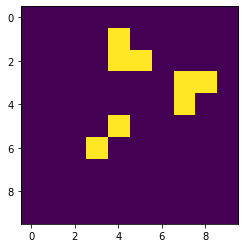

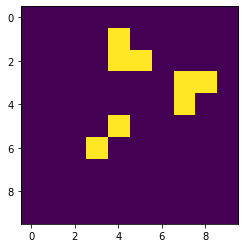

In [180]:
#question 4
rep = np.zeros(10*10).reshape(10,10)
rep[2][4]=rep[2][5]=rep[2][6]=rep[2][7]=rep[3][7]=255
rep[4][7]=rep[5][7]=rep[3][3]=rep[4][2]=rep[5][2]=255
rep[6][2]=rep[7][2]=rep[7][3]=rep[7][4]=rep[7][5]=255
rep[6][6]=255
gun = np.zeros(10*10).reshape(10,10)
gun[4][5] = gun[4][6] = 255
gun[5][5] = gun[5][4] = gun[6][5] = 255



fig, ax = plt.subplots()
img = ax.imshow(gun, interpolation='nearest')
animate = lambda i: immi(10,img,randomGrid(10),10)
for i in range(2): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()



In [145]:
gun = np.zeros(10*10).reshape(10,10)
gun[4][5] = gun[4][6] = 255
gun[5][5] = gun[5][4] = gun[6][5] = 255
gun

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 255., 255.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 255., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

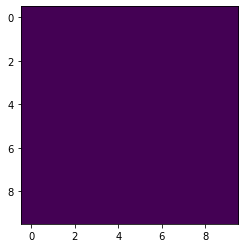

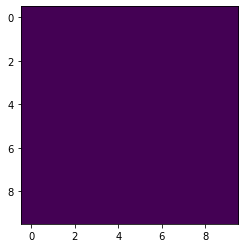

In [129]:
def highlife(frameNum, img, grid, N):
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if (total == 3) or (total == 6): #another rule  : a dead cell comes to life if it is sur-
#rounded by 6 living cells
                    newGrid[i, j] = ON
            
    # update data
    #print(newGrid,grid)    
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,
gun = np.zeros(10*10).reshape(10,10)
gun[4][5] = gun[4][6] = 255
gun[5][5] = gun[5][4] = gun[6][5] = 255
fig, ax = plt.subplots()
img = ax.imshow(gun, interpolation='nearest')
animate = lambda i: highlife(10,img,gun,10)
for i in range(10): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()

In [105]:
addGosperGliderGun(0,0,randomGrid(10))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0,   0,   0],
       [  0,   0, 100,   0,   0,   0,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0,   0,   0,   0,   0]])

In [27]:
def rain(frameNum, img, grid, N):
    
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            
            # apply Conway's rules
            if grid[i, j] == OFF:
                if (total == 1) :
                    newGrid[i, j] = GREY
    print(total)
    # update data
    #print(newGrid,grid)    
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,total

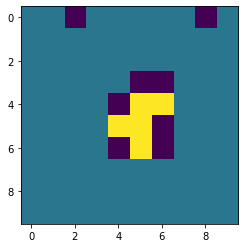

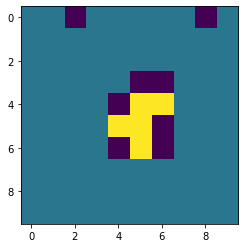

In [181]:
rep = np.zeros(10*10).reshape(10,10)
rep[2][4]=rep[2][5]=rep[2][6]=rep[2][7]=rep[3][7]=255
rep[4][7]=rep[5][7]=rep[3][3]=rep[4][2]=rep[5][2]=255
rep[6][2]=rep[7][2]=rep[7][3]=rep[7][4]=rep[7][5]=255
rep[6][6]=255
gun = np.zeros(10*10).reshape(10,10)
gun[4][5] = gun[4][6] = 255
gun[5][5] = gun[5][4] = gun[6][5] = 255
fig, ax = plt.subplots()
img = ax.imshow(gun, interpolation='nearest')
animate = lambda i: rain(10,img,gun,10)
for i in range(69): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()



In [114]:
gun

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

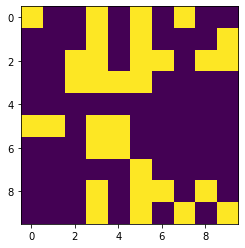

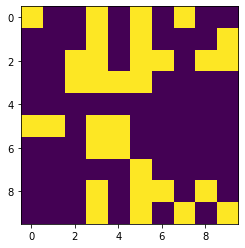

In [125]:
N=10
a=0
gun = np.zeros(10*10).reshape(10,10)
gun[4][5] = gun[4][6] = 255
gun[5][5] = gun[5][4] = gun[6][5] = 255
for k in range(5):
    newGrid = gun.copy()
    for i in range(N):
        for j in range(N):
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((gun[i, (j-1)%N] + gun[i, (j+1)%N] +
                        gun[(i-1)%N, j] + gun[(i+1)%N, j] +
                        gun[(i-1)%N, (j-1)%N] + gun[(i-1)%N, (j+1)%N] +
                        gun[(i+1)%N, (j-1)%N] + gun[(i+1)%N, (j+1)%N])/255)
            
            # apply Conway's rules
            
            if gun[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    gun[:] = newGrid[:]
    a+=1
fig, ax = plt.subplots()
img = ax.imshow(gun, interpolation='nearest')

animate = lambda i: immi(10,img,gun,10)


for i in range(64):
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()

In [31]:
gun

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 255., 255.,   0., 255., 255.,   0.,   0.],
       [  0.,   0.,   0., 255.,   0.,   0., 255.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 255., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [811]:
update(10,img,rep,10)

(<matplotlib.image.AxesImage at 0x7f6f8e433c70>,)

In [45]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output



In [32]:
def update(frameNum, img, grid, N):
    
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            # apply Conway's rules
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    # update data
    #print(newGrid,grid)    
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

In [1122]:
randomGrid(10)

array([[  0,   0, 255,   0, 255,   0, 255,   0,   0, 255],
       [255,   0,   0,   0,   0,   0, 255,   0,   0, 255],
       [255,   0,   0,   0, 255,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0,   0],
       [255,   0,   0,   0,   0, 255,   0,   0, 255,   0],
       [255,   0,   0,   0,   0,   0, 255,   0,   0, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [255,   0,   0,   0,   0,   0,   0, 255, 255,   0],
       [  0, 255,   0,   0,   0, 255,   0, 255,   0,   0],
       [255,   0,   0,   0,   0,   0,   0, 255,   0,   0]])

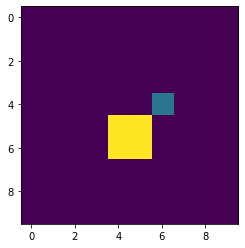

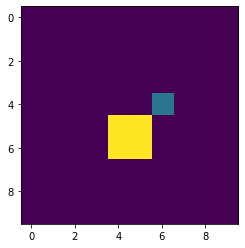

In [128]:
gun = np.zeros(10*10).reshape(10,10)
gun[4][5] = gun[4][6] = 100
gun[5][5] = gun[5][4] = gun[6][5] = 255


#annimation code
fig, ax = plt.subplots()
img = ax.imshow(gun, interpolation='nearest')
animate = lambda i: immi(10,img,gun,10)
for i in range(10): #no of generations
    animate(i)
    clear_output(wait=True)
    
    display(fig)

plt.show()



In [1095]:
zero = np.zeros(7*7).reshape(7,7)
addGlider(1,1,zero)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 255.,   0.,   0.,   0.],
       [  0., 255.,   0., 255.,   0.,   0.,   0.],
       [  0.,   0., 255., 255.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.]])

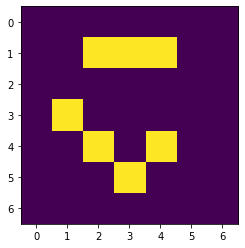

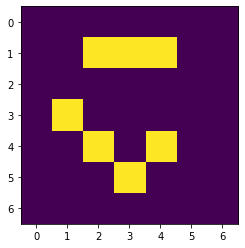

In [58]:
zero = np.zeros(7*7).reshape(7,7)


#annimation code
fig, ax = plt.subplots()
img = ax.imshow(addGlider(1,1,zero), interpolation='nearest')
animate = lambda i: update(10,img,addGlider(1,1,zero),7)
for i in range(5): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()

In [47]:
gun

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 255., 255.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 255., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [800]:
update(10,img,gun,10)

(<matplotlib.image.AxesImage at 0x7f6f8e0250a0>,)

In [799]:
img1 = ax.imshow(newGrid, interpolation='nearest')


In [39]:
# main() function
def main():
    # Command line args are in sys.argv[1], sys.argv[2] ..
    # sys.argv[0] is the script name itself and can be ignored
    # parse arguments
    parser = argparse.ArgumentParser(description="Runs Conway's Game of Life simulation.")
    # add arguments
    parser.add_argument('--grid-size', dest='N', required=False)
    parser.add_argument('--mov-file', dest='movfile', required=False)
    parser.add_argument('--interval', dest='interval', required=False)
    parser.add_argument('--glider', action='store_true', required=False)
    parser.add_argument('--gosper', action='store_true', required=False)
    args = parser.parse_args()
    # set grid size
    N = 10
    if args.N and int(args.N) > 8:
        N = int(args.N)
    # set animation update interval
    updateInterval = 500
    if args.interval:
        updateInterval = int(args.interval)
    # declare grid
    grid = np.array([])
    # check if "glider" demo flag is specified
    if args.glider:
        grid = np.zeros(N*N).reshape(N, N)
        addGlider(1, 1, grid)
    elif args.gosper:
        grid = np.zeros(N*N).reshape(N, N)
        addGosperGliderGun(10, 10, grid)
    else:
        # populate grid with random on/off - more off than on
        grid = randomGrid(N)
    # set up animation
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                                frames = 10,
                                interval=updateInterval,
                                save_count=50)
    # # of frames?
    # set output file
    if args.movfile:
        ani.save(args.movfile, fps=30, extra_args=['-vcodec', 'libx264'])
    plt.show()
    # call main
    if __name__ == '__main__':
        main()

In [40]:
main()

usage: ipykernel_launcher.py [-h] [--grid-size N] [--mov-file MOVFILE]
                             [--interval INTERVAL] [--glider] [--gosper]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/harshithbabu/.local/share/jupyter/runtime/kernel-69982c69-15c8-4871-bc8b-294dcca34f30.json


SystemExit: 2

/home/harshithbabu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [234]:
%tb

SystemExit: 2

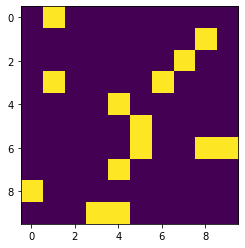

In [48]:
import argparse
import sys
parser = argparse.ArgumentParser(description="Runs Conway's Game of Life simulation.")
    # add arguments
parser.add_argument('--grid-size', dest='N', required=False)
parser.add_argument('--mov-file', dest='movfile', required=False)
parser.add_argument('--interval', dest='interval', required=False)
parser.add_argument('--glider', action='store_true', required=False)
parser.add_argument('--gosper', action='store_true', required=False)
parser.add_argument('-f')
args = parser.parse_args()
    # set grid size
N = 10
if args.N and int(args.N) > 8:
    N = int(args.N)
    # set animation update interval
updateInterval = 50
if args.interval:
    updateInterval = int(args.interval)
    # declare grid
grid = np.array([])
    # check if "glider" demo flag is specified
if args.glider:
    grid = np.zeros(N*N).reshape(N, N)
    addGlider(1, 1, grid)
elif args.gosper:
    grid = np.zeros(N*N).reshape(N, N)
    addGosperGliderGun(10, 10, grid)
else:
        # populate grid with random on/off - more off than on
    grid = randomGrid(N)
    # set up animation
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                                frames = 10,
                                interval=updateInterval,
                                save_count=100)
    # # of frames?
    # set output file
if args.movfile:
    ani.save(args.movfile, fps=60, extra_args=['-vcodec', 'libx264'])
plt.show()

In [42]:
%tb

SystemExit: 2

In [97]:
parser = argparse.ArgumentParser(description="Runs Conway's Game of Life simulation.")
# add arguments
parser.add_argument("--gridsize",action='store_true')

args = parser.parse_args()
if args.gridsize :
    print("harshith")

usage: ipykernel_launcher.py [-h] [--gridsize]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/harshithbabu/.local/share/jupyter/runtime/kernel-1bb45313-9a03-4150-b4fc-de20b51cfa2a.json


SystemExit: 2

In [96]:
%tb

SystemExit: 2

In [98]:
parser = argparse.ArgumentParser()
parser.add_argument("--verbosity", help="increase output verbosity")
args = parser.parse_args()
if args.verbosity:
    print("verbosity turned on")

usage: ipykernel_launcher.py [-h] [--verbosity VERBOSITY]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/harshithbabu/.local/share/jupyter/runtime/kernel-1bb45313-9a03-4150-b4fc-de20b51cfa2a.json


SystemExit: 2

In [80]:
parser = argparse.ArgumentParser(prog='PROG')
parser.add_argument('-x')
parser.add_argument('--foo')
parser.parse_args(['-x', 'X'])


Namespace(foo=None, x='X')

In [82]:
%tb

SystemExit: 2